Exercise - Investigate High Paying Skills

In [3]:
#import all necessary libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

#load the dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
#convert string dtype to list dtype
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [5]:
#i only want the data analyst jobs present in the us
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

#remove all the nan values from the salary_year_avg col
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

In [7]:
#explode the job_skills col and convert it into individual rows
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US['job_skills']

109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [8]:
df_DA_US[['job_skills','salary_year_avg']]

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0
...,...,...
784882,sql,87500.0
784882,vba,87500.0
784882,tableau,87500.0
784882,excel,87500.0


In [10]:
#now we need to create a df where we have median salary and count of job_skills
#therefore we will use the groupby method

#first we will access the job_skills col from our df
#apply the groupby method so that same jobs can be grouped together
#eg all software jobs grouped together, all data scientist jobs together, all teachers jobs grouped together
#then we will access the salary_year_avg of each group
#and apply the count and median on the salaries
#we access the salaries of each group and apply 2 methods on it(count and median)

df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

In [ ]:
''' 
Imagine you're at a big party with people who have different jobs:

👨‍💼 Software Engineers

👩‍🔬 Data Scientists

👨‍🏫 Teachers

👩‍💼 Marketing Managers

You want to understand the salary situation at this party.

What This Code Does:
df_DA_US.groupby('job_skills')

"Group everyone at the party by their job type"

Put all Software Engineers in one group

Put all Data Scientists in another group

Put all Teachers in another group

etc.

['salary_year_avg']

"Now, focus only on their annual salaries"

Look only at the salary information for each group

.agg(['count','median'])

"For each job group, calculate two things:"

count: How many people have this job?

median: What's the typical salary for this job? (The middle value where half earn more and half earn less)

'''

In [16]:
#now we need 2 dataframes
#1st df with the top 10 highest salaries
#2nd df with the top 10 skills wjich have higher count


#create the top pay salary df
#top 10 skills based on median salaries
#jiska median salary is high uska skill will be shown first

df_DA_top_pay=df_DA_US_group.sort_values(by='median',ascending=False).head(10)
df_DA_top_pay

#2nd df is skills with highest count with the highest median salaries
#we sort skills according to the count col and then again we have to sort it according to the median col
#first find thetop 10 most common skills and then for those skills find which one pays the best
df_DA_skills=df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


In [ ]:
#to get the 1st df we sort the current df according to the median salaries
#we sort the skills according to the median salaries
#jiska sabse highest median salary that skill will be shown first

#to get the 2nd df we sort the current df according to the count col
#we sort skills according to the count col

#in the first df we sorted skills according to highest salaries
#in 2nd df we sort skills according to count and then again sort it acc to the median salaries

''' 
Step 1: sort_values(by='count',ascending=False).head(10)
"Find the 10 most common/frequent skills"

This gives you the skills that appear most often in job postings

Example result might be: SQL, Python, Excel, Tableau, etc.

Step 2: sort_values(by='median',ascending=False).head(10)
"Now, from those 10 common skills, find which ones pay the best"

This re-sorts those 10 common skills by salary to see which of them are highest-paying
'''

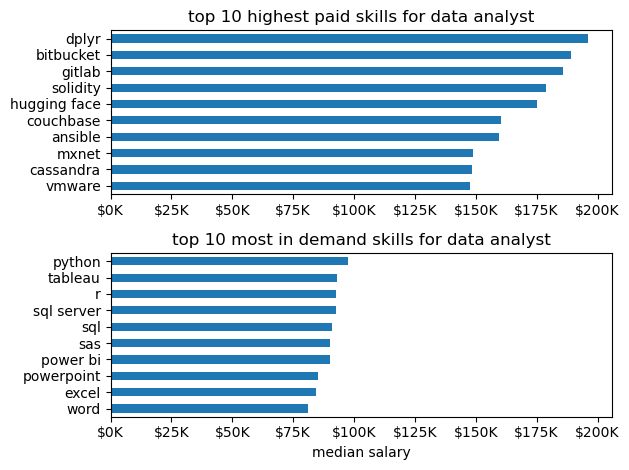

In [27]:
#now lets plot this
#since we need to plot 2 plots we use subplots
#2 figures in 1 col
fig, ax=plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh',y='median' ,ax=ax[0],legend=False)
#invert the y axis for the first graph
ax[0].invert_yaxis()
ax[0].set_title('top 10 highest paid skills for data analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
#modify the values int the x axis
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))

df_DA_skills.plot(kind='barh',y='median',ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_title('top 10 most in demand skills for data analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary')
#modify the x axis set the 2nd graph axis acc to the first one
ax[1].set_xlim(ax[0].get_xlim())
#modify the values in the x axis
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))

#to avoid overlap
fig.tight_layout()
plt.show()